# Import Libraries

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Cleaning

In [20]:
file_path = '/mnt/data/Sample - Superstore.csv'
superstore_data = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding='latin1')

superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'])

missing_values = superstore_data.isnull().sum()

superstore_data = superstore_data.drop_duplicates()

superstore_data['Sales'].fillna(superstore_data['Sales'].median(), inplace=True)
superstore_data['Profit'].fillna(superstore_data['Profit'].median(), inplace=True)

print(superstore_data.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

/tmp/ipykernel_35/1739533961.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data['Sales'].fillna(superstore_data['Sales'].median(), inplace=True)
/tmp/ipykernel_35/1739533961.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

# Exploratory Data Analysis

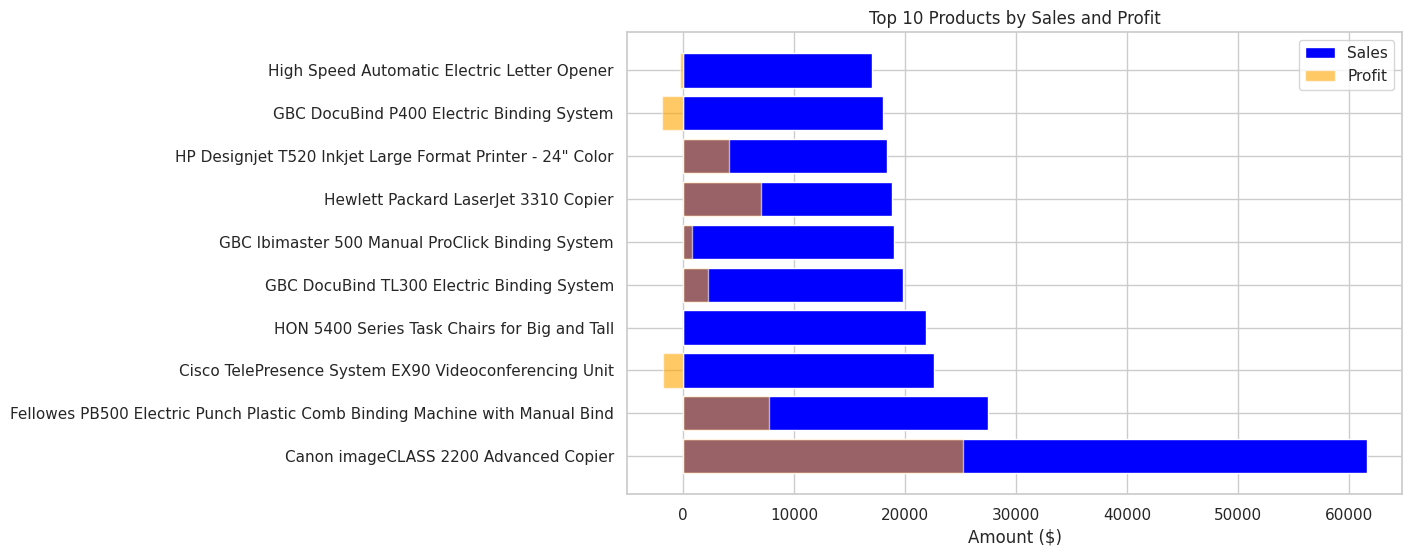

In [21]:
product_summary = superstore_data.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()


top_products_sales = product_summary.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products_sales['Product Name'], top_products_sales['Sales'], color='blue', label='Sales')
plt.barh(top_products_sales['Product Name'], top_products_sales['Profit'], color='orange', alpha=0.6, label='Profit')
plt.xlabel('Amount ($)')
plt.title('Top 10 Products by Sales and Profit')
plt.legend()
plt.show()


# Identify Key Performance Indicators (KPIs)

In [22]:
total_sales = superstore_data['Sales'].sum()
total_profit = superstore_data['Profit'].sum()
avg_profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.47%


# Advanced Analysis

**Impact of Discounts on Product Performance**

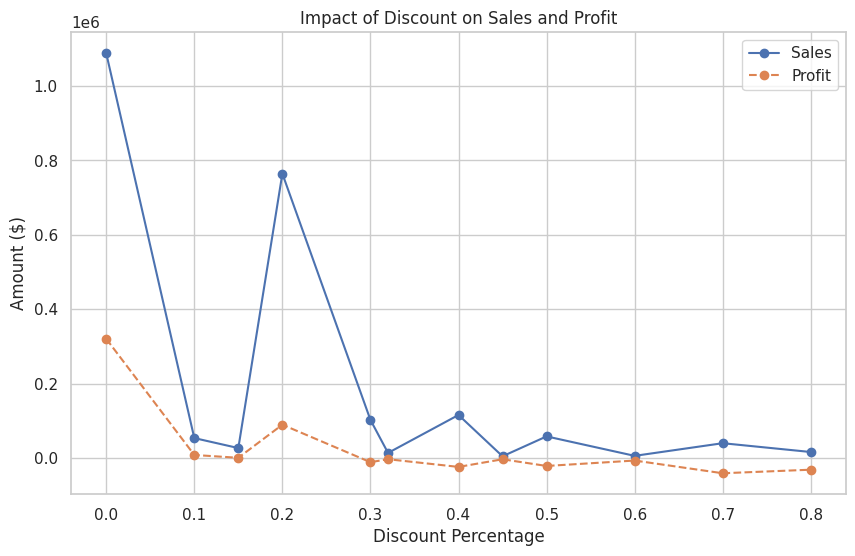

In [23]:
discount_analysis = superstore_data.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(discount_analysis['Discount'], discount_analysis['Sales'], label='Sales', marker='o')
plt.plot(discount_analysis['Discount'], discount_analysis['Profit'], label='Profit', marker='o', linestyle='--')
plt.xlabel('Discount Percentage')
plt.ylabel('Amount ($)')
plt.title('Impact of Discount on Sales and Profit')
plt.legend()
plt.show()


**Compare Product Performance Across Regions and Segments**

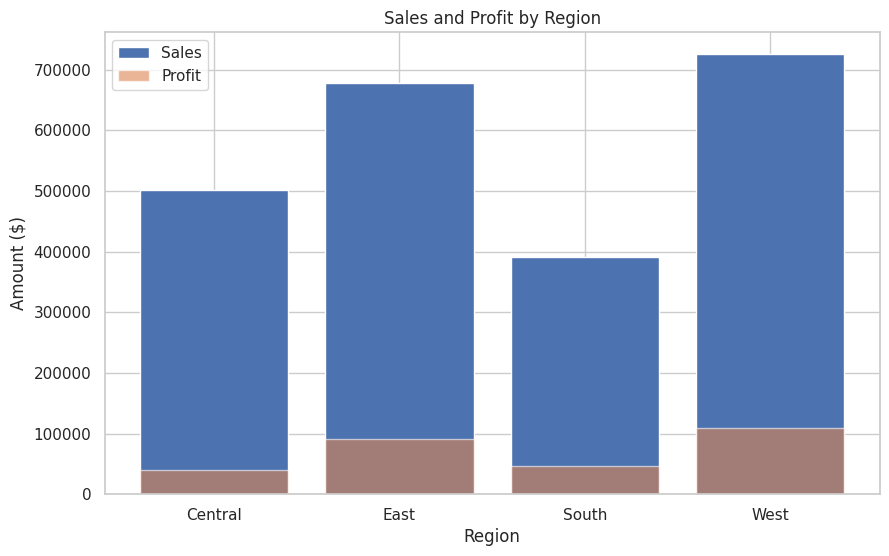

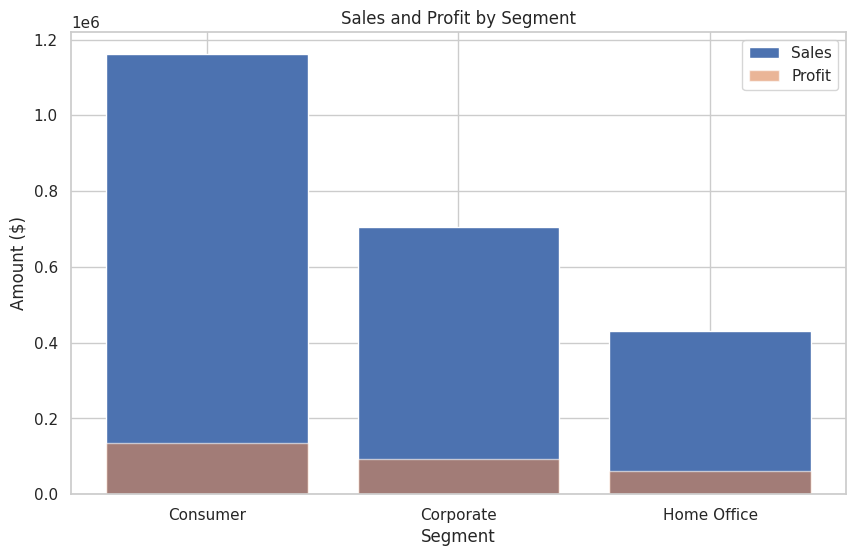

In [24]:
region_performance = superstore_data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(region_performance['Region'], region_performance['Sales'], label='Sales')
plt.bar(region_performance['Region'], region_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Region')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Region')
plt.legend()
plt.show()

segment_performance = superstore_data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(segment_performance['Segment'], segment_performance['Sales'], label='Sales')
plt.bar(segment_performance['Segment'], segment_performance['Profit'], label='Profit', alpha=0.6)
plt.xlabel('Segment')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Segment')
plt.legend()
plt.show()


# Prepare Insights and Report

This step involves generating insights and visualizations, which could be combined into a report. For this, you can create a simple summary dataframe or use any reporting tool (e.g., Jupyter Notebook or PowerPoint) to present the findings.

In [25]:
category_performance = superstore_data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

print(category_performance.sort_values('Sales', ascending=False))

category_performance.to_excel("product_performance_report.xlsx", index=False)


          Category        Sales       Profit
2       Technology  836154.0330  145454.9481
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008


# Model Selection

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load data
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")
df_reg = df[['Sales', 'Profit']].dropna()
df_reg = df_reg[df_reg['Sales'] > 0]

# Features and target
X = df_reg[['Sales']]
y = df_reg['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} — MAE: {mean_absolute_error(y_test, y_pred):.2f}, "
          f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}, "
          f"R²: {r2_score(y_test, y_pred):.2f}")


Linear Regression — MAE: 70.90, RMSE: 295.02, R²: -0.80
Random Forest — MAE: 58.53, RMSE: 315.39, R²: -1.05
Gradient Boosting — MAE: 60.33, RMSE: 339.16, R²: -1.37


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean data
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'
df_extended = df[features + [target]].dropna()

# Encode categorical features
df_encoded = pd.get_dummies(df_extended, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Split data
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} — MAE: {mean_absolute_error(y_test, y_pred):.2f}, "
          f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}, "
          f"R²: {r2_score(y_test, y_pred):.2f}")


Linear Regression — MAE: 70.02, RMSE: 291.13, R²: -0.75
Random Forest — MAE: 32.39, RMSE: 235.61, R²: -0.14
Gradient Boosting — MAE: 37.00, RMSE: 232.56, R²: -0.12


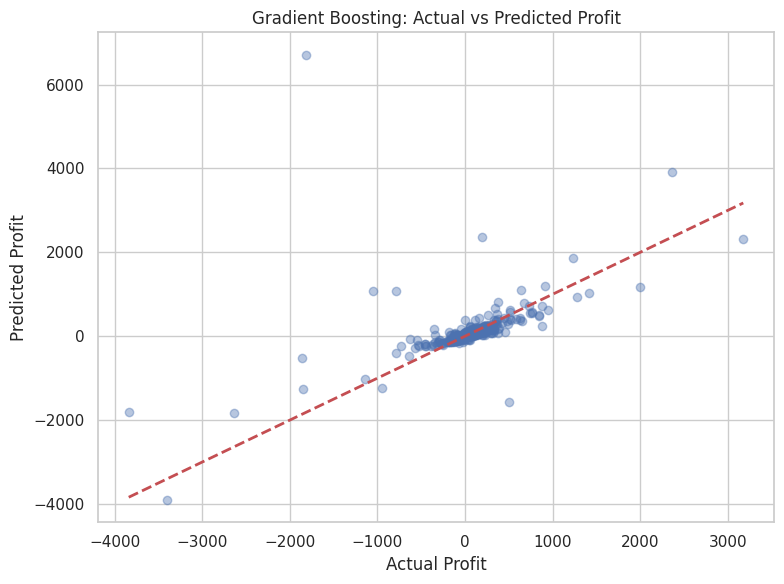

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select and clean features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'
df_clean = df[features + [target]].dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Train/test split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot actual vs predicted profit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Gradient Boosting: Actual vs Predicted Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


MAE: 26.75
RMSE: 141.47
R² Score: 0.74


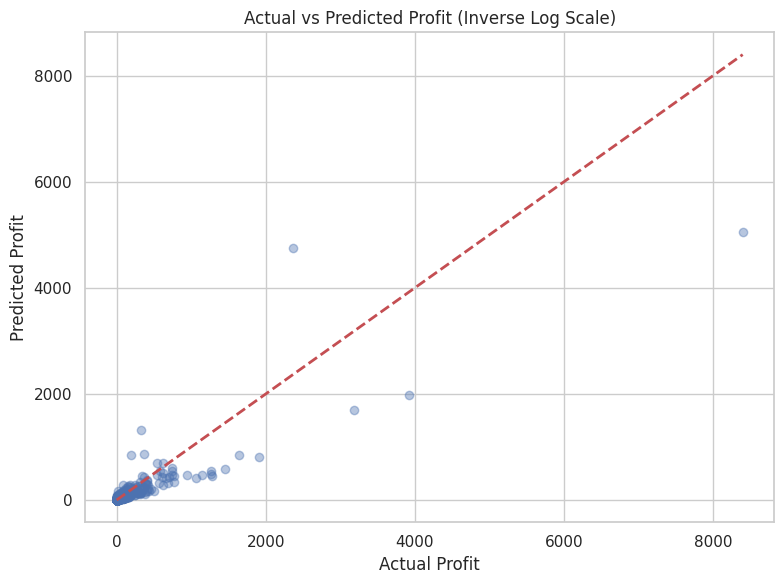

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select relevant features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

# Drop NA and remove rows where Profit <= -1 for log1p
df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]

# Apply log1p transformation
df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict in log scale
y_pred_log = model.predict(X_test)

# Invert log1p transformation for real profit scale
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

# Evaluate on real scale
mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2_real = r2_score(y_test_real, y_pred_real)

print(f"MAE: {mae_real:.2f}")
print(f"RMSE: {rmse_real:.2f}")
print(f"R² Score: {r2_real:.2f}")

# Plot actual vs predicted profit
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Inverse Log Scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest — MAE: 25.34, RMSE: 137.80, R²: 0.76


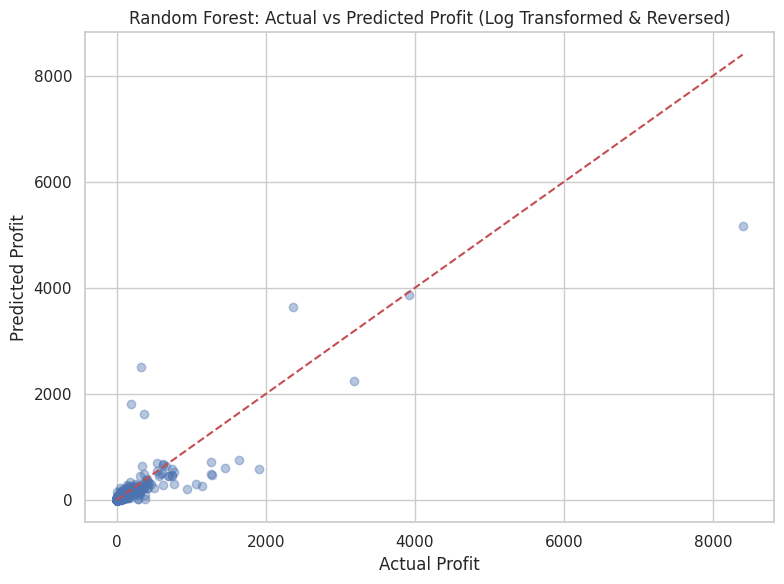

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select relevant features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

# Filter out invalid rows for log transformation
df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]  # ensure log1p is safe

# Apply log1p transformation
df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Split data into features and target
X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set (log scale)
y_pred_log = rf_model.predict(X_test)

# Clip predictions to avoid overflow when reversing log1p
y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=20)
y_test_log_clipped = np.clip(y_test, a_min=None, a_max=20)

# Invert log1p transformation to return to real scale
y_pred_real = np.expm1(y_pred_log_clipped)
y_test_real = np.expm1(y_test_log_clipped)

# Evaluate performance
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Random Forest — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Random Forest: Actual vs Predicted Profit (Log Transformed & Reversed)")
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression — MAE: 32.06, RMSE: 214.53, R²: 0.41


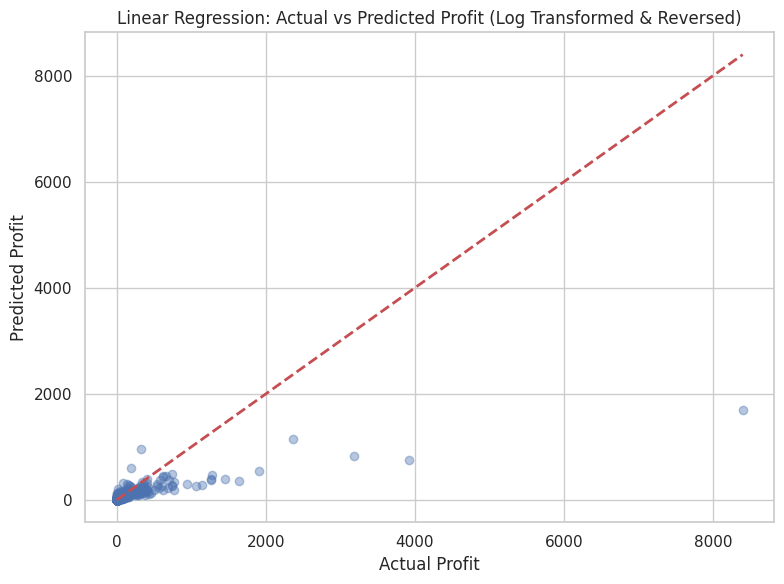

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select relevant features
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

# Drop missing values and filter for valid log1p input
df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]

# Apply log1p transformation
df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data (log scale)
y_pred_log = lr_model.predict(X_test)

# Clip predictions to avoid numerical overflow on inverse transform
y_pred_log_clipped = np.clip(y_pred_log, a_min=None, a_max=20)
y_test_log_clipped = np.clip(y_test, a_min=None, a_max=20)

# Invert log1p transformation to original scale
y_pred_real = np.expm1(y_pred_log_clipped)
y_test_real = np.expm1(y_test_log_clipped)

# Evaluate performance
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Linear Regression — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Plot predicted vs actual profit
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.4)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Linear Regression: Actual vs Predicted Profit (Log Transformed & Reversed)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Linear Regression': {
        'fit_intercept': [True, False]
    }
}

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Dictionary to store best parameters
best_params = {}

# Perform GridSearchCV
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_

# Show results
print("\nBest Hyperparameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for Linear Regression...

Best Hyperparameters for Each Model:
Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Linear Regression: {'fit_intercept': True}


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select relevant features and target
features = ['Sales', 'Discount', 'Quantity', 'Category', 'Segment', 'Region', 'Ship Mode']
target = 'Profit'

# Drop NAs and filter for valid log1p
df_log = df[features + [target]].dropna()
df_log = df_log[df_log['Profit'] > -1]

# Apply log transformation
df_log['Sales'] = np.log1p(df_log['Sales'])
df_log['Profit'] = np.log1p(df_log['Profit'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_log, columns=['Category', 'Segment', 'Region', 'Ship Mode'], drop_first=True)

# Split data
X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store evaluation results
results = {}

# Random Forest with best hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = np.expm1(np.clip(rf_model.predict(X_test), a_min=None, a_max=20))
results['Random Forest'] = {
    'MAE': mean_absolute_error(np.expm1(y_test), y_pred_rf),
    'RMSE': mean_squared_error(np.expm1(y_test), y_pred_rf, squared=False),
    'R2': r2_score(np.expm1(y_test), y_pred_rf)
}

# Gradient Boosting with best hyperparameters
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = np.expm1(np.clip(gb_model.predict(X_test), a_min=None, a_max=20))
results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(np.expm1(y_test), y_pred_gb),
    'RMSE': mean_squared_error(np.expm1(y_test), y_pred_gb, squared=False),
    'R2': r2_score(np.expm1(y_test), y_pred_gb)
}

# Linear Regression with best hyperparameters
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)
y_pred_lr = np.expm1(np.clip(lr_model.predict(X_test), a_min=None, a_max=20))
results['Linear Regression'] = {
    'MAE': mean_absolute_error(np.expm1(y_test), y_pred_lr),
    'RMSE': mean_squared_error(np.expm1(y_test), y_pred_lr, squared=False),
    'R2': r2_score(np.expm1(y_test), y_pred_lr)
}

# Display results
print("Model Performance (Original Profit Scale):")
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MAE  = {metrics['MAE']:.2f}")
    print(f"  RMSE = {metrics['RMSE']:.2f}")
    print(f"  R²   = {metrics['R2']:.2f}\n")


Model Performance (Original Profit Scale):
Random Forest:
  MAE  = 26.29
  RMSE = 144.56
  R²   = 0.73

Gradient Boosting:
  MAE  = 25.14
  RMSE = 130.11
  R²   = 0.78

Linear Regression:
  MAE  = 32.06
  RMSE = 214.53
  R²   = 0.41



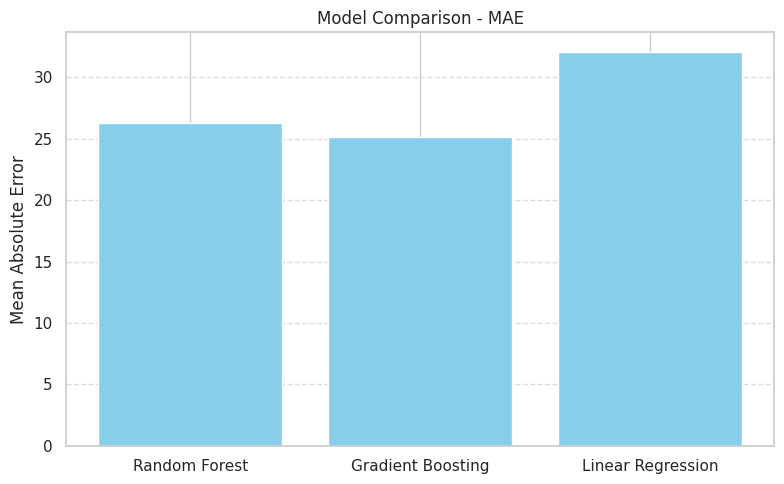

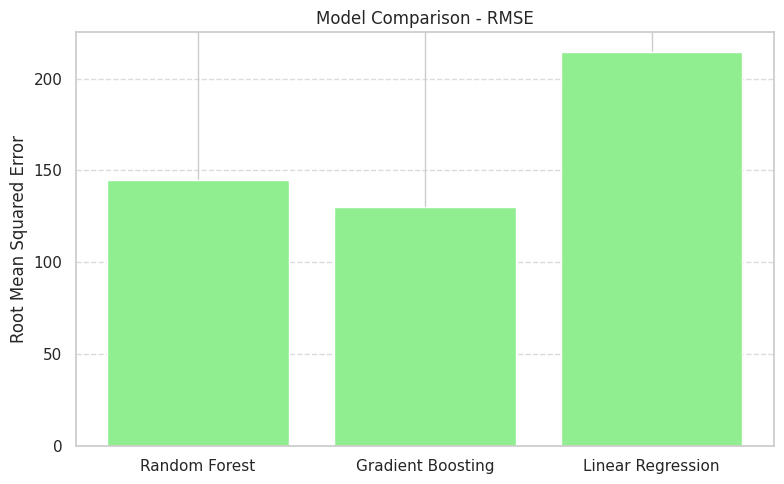

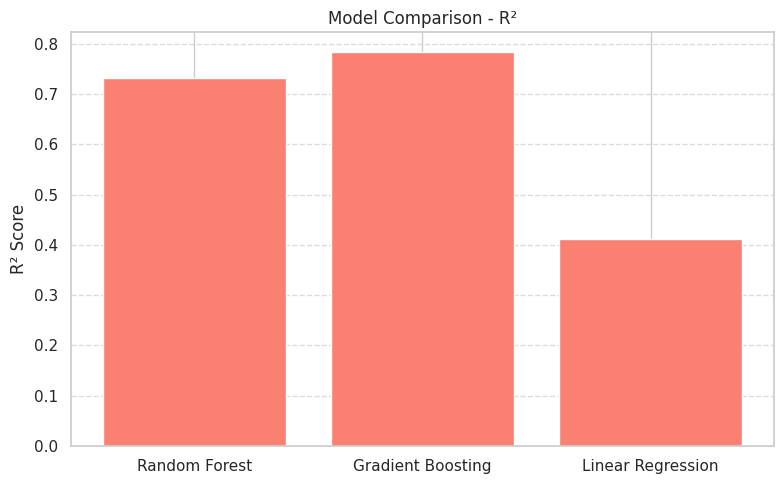

In [34]:
import matplotlib.pyplot as plt

# Assuming 'results' is already defined and contains model performance
models = list(results.keys())
mae_scores = [results[model]['MAE'] for model in models]
rmse_scores = [results[model]['RMSE'] for model in models]
r2_scores = [results[model]['R2'] for model in models]

# 1. MAE Plot
plt.figure(figsize=(8, 5))
plt.bar(models, mae_scores, color='skyblue')
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison - MAE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. RMSE Plot
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_scores, color='lightgreen')
plt.ylabel("Root Mean Squared Error")
plt.title("Model Comparison - RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. R² Score Plot
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color='salmon')
plt.ylabel("R² Score")
plt.title("Model Comparison - R²")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


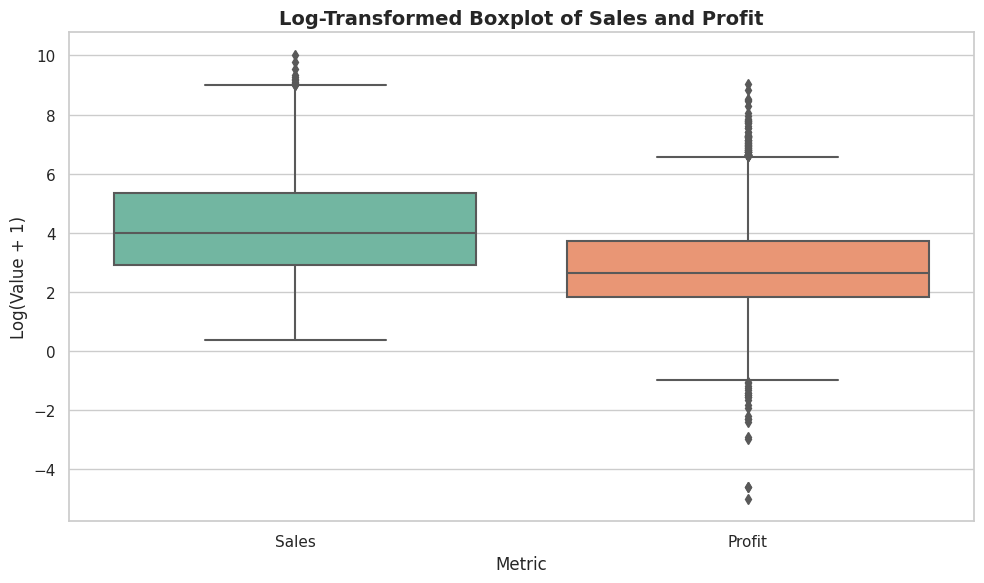

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust path if needed)
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Prepare data: filter out zero or negative values to avoid log errors
df_plot = df[['Sales', 'Profit']].copy()
df_plot = df_plot[(df_plot['Sales'] > 0) & (df_plot['Profit'] != 0)]

# Apply log1p transformation to handle skewness and outliers
df_plot = df_plot.apply(np.log1p)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, palette='Set2')

# Customize labels and title
plt.title('Log-Transformed Boxplot of Sales and Profit', fontsize=14, fontweight='bold')
plt.ylabel('Log(Value + 1)', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Render the plot
plt.tight_layout()
plt.show()


Quantity anomalies detected (Z-score method): 113
Sales anomalies detected (IQR method): 1167


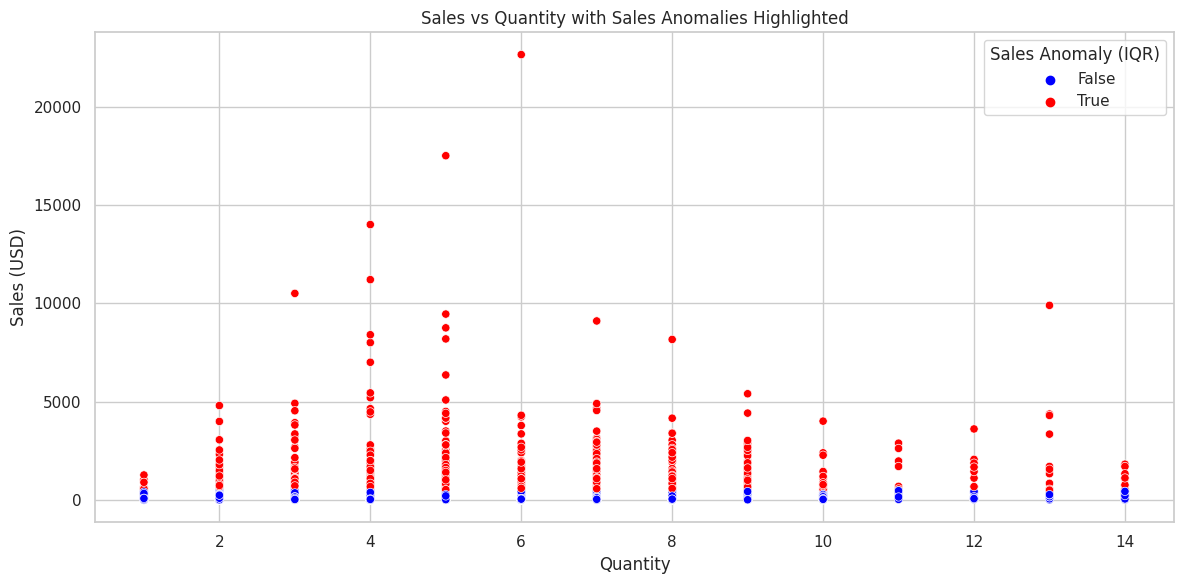

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Method 1: Z-score method (for Quantity)
df['z_score_quantity'] = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()
df['quantity_anomaly_z'] = df['z_score_quantity'].abs() > 3  # Z-score > 3 considered anomaly

# Method 2: IQR method (for Sales)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['sales_anomaly_iqr'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

# Summary
num_quantity_anomalies = df['quantity_anomaly_z'].sum()
num_sales_anomalies = df['sales_anomaly_iqr'].sum()
print(f"Quantity anomalies detected (Z-score method): {num_quantity_anomalies}")
print(f"Sales anomalies detected (IQR method): {num_sales_anomalies}")

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Sales', hue='sales_anomaly_iqr', palette={False: 'blue', True: 'red'})
plt.title('Sales vs Quantity with Sales Anomalies Highlighted')
plt.xlabel('Quantity')
plt.ylabel('Sales (USD)')
plt.legend(title='Sales Anomaly (IQR)')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


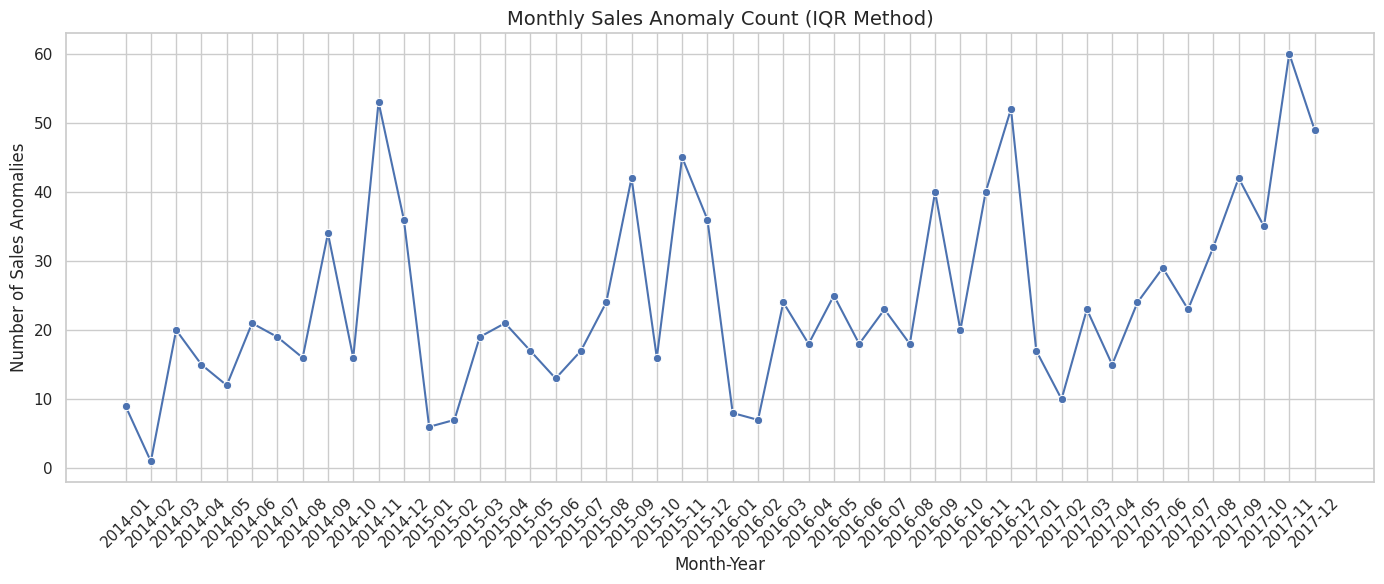

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (adjust path if running locally)
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# IQR-based anomaly detection on Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['sales_anomaly_iqr'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

# Extract Month-Year for grouping
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Count anomalies per month
anomaly_trend = df[df['sales_anomaly_iqr']].groupby('Month-Year').size().reset_index(name='Anomaly Count')

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=anomaly_trend, x='Month-Year', y='Anomaly Count', marker='o')
plt.title('Monthly Sales Anomaly Count (IQR Method)', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Sales Anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")

# Select necessary columns and drop missing values
df = df[['Sales', 'Quantity', 'Discount', 'Profit']].dropna()

# Filter out invalid entries
df = df[(df['Sales'] > 0) & (df['Profit'] != 0)]

# Apply log transformation to the target
df['Log_Profit'] = np.log1p(df['Profit'])
df = df[np.isfinite(df['Log_Profit'])]  # Remove any resulting NaNs or Infs

# Define features and target
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Log_Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output results
print("Linear Regression Performance:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


Linear Regression Performance:
MAE  : 0.853
RMSE : 1.064
R²   : 0.454


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


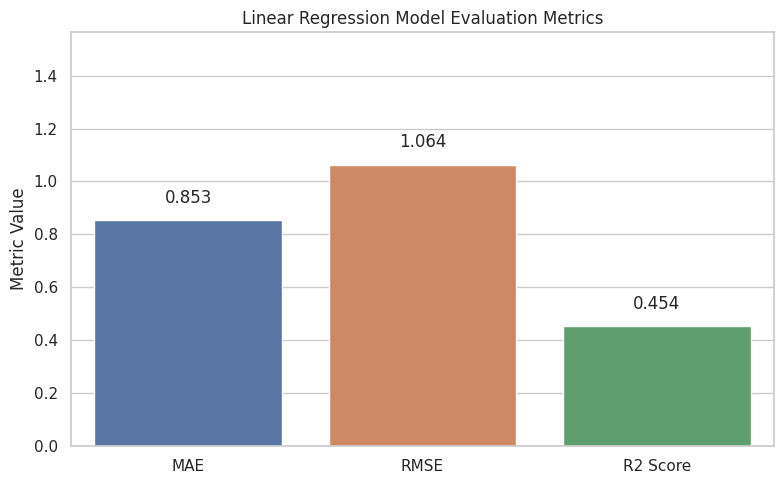

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already calculated these metrics
mae = 0.853
rmse = 1.064
r2 = 0.454

# Create a dictionary of metrics
metrics = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values)
plt.title("Linear Regression Model Evaluation Metrics")
plt.ylabel("Metric Value")
plt.ylim(0, max(metric_values) + 0.5)

# Annotate values on bars
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.05, f"{value:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")
df = df[['Sales', 'Quantity', 'Discount', 'Profit']].dropna()
df = df[(df['Sales'] > 0) & (df['Profit'] != 0)]
df['Log_Profit'] = np.log1p(df['Profit'])
df = df[np.isfinite(df['Log_Profit'])]

# Define features and target
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Log_Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output results
print("Random Forest Model Performance:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Random Forest Model Performance:
MAE  : 0.379
RMSE : 0.546
R²   : 0.856


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load and preprocess dataset
df = pd.read_csv("/kaggle/input/store-sales-analysis/Sample - Superstore.csv", encoding="ISO-8859-1")
df = df[['Sales', 'Quantity', 'Discount', 'Profit']].dropna()
df = df[(df['Sales'] > 0) & (df['Profit'] != 0)]
df['Log_Profit'] = np.log1p(df['Profit'])
df = df[np.isfinite(df['Log_Profit'])]

# Feature and target selection
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Log_Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compute evaluation metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 =_


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
